In [2]:
import sympy
sympy.init_printing() 

In [3]:
from sympy import Function, Derivative, Eq, symbols
from sympkf import SymbolicPKF, t, PDESystem, Expectation

In [4]:
x = symbols('x')
u = Function('u')(t, x)
c = Function('c')(t,x)

# Equation d'avection 

In [5]:
dynamics = [Eq(Derivative(c,t), u*Derivative(c,x)), Eq(Derivative(u,t),0)]
display(dynamics)

C:\Users\vince\anaconda3\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The to_png function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
C:\Users\vince\anaconda3\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The to_rgba function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
C:\Users\vince\anaconda3\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The to_mask function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
C:\Users\vince\anaconda3\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The MathtextBa

In [6]:
dynamics = PDESystem(dynamics)
dynamics

PDE System :
        prognostic functions : c(t, x), u(t, x)
        constant functions   : 
        exogeneous functions : 
        constants            : 
        

In [7]:
pkf_advection = SymbolicPKF(dynamics)

In [8]:
for equation in pkf_advection.in_metric:
    display(equation)

                         ∂                                                    
              V_cu(t, x)⋅──({V_{c}}(t, x))                                    
∂                        ∂x                          ∂               _________
──(c(t, x)) = ──────────────────────────── + u(t, x)⋅──(c(t, x)) + ╲╱ {V_{c}}(
∂t                  2⋅{V_{c}}(t, x)                  ∂x                       

                                                                              
                                                                              
______   _______________            ⎛                           ∂             
t, x) ⋅╲╱ {V_{u}}(t, x) ⋅Expectation⎜{\varepsilon_{u}}(t, x, ω)⋅──({\varepsilo
                                    ⎝                           ∂x            

                 
                 
                ⎞
n_{c}}(t, x, ω))⎟
                ⎠

                                    ∂                                         
                 V_cu(t, x)⋅u(t, x)⋅──({V_{c}}(t, x))                         
∂                                   ∂x                            ____________
──(V_cu(t, x)) = ──────────────────────────────────── + u(t, x)⋅╲╱ {V_{c}}(t, 
∂t                         2⋅{V_{c}}(t, x)                                    

                                                                              
                                                                              
___   _______________            ⎛                           ∂                
x) ⋅╲╱ {V_{u}}(t, x) ⋅Expectation⎜{\varepsilon_{u}}(t, x, ω)⋅──({\varepsilon_{
                                 ⎝                           ∂x               

                                          
                                          
             ⎞                 ∂          
c}}(t, x, ω))⎟ + {V_{u}}(t, x)⋅──(c(t, x))
             ⎠                 ∂x   

                                                                              
                                                                              
                                                       ∂                      
                         2⋅V_cu(t, x)⋅{g_{c,xx}}(t, x)⋅──(c(t, x))            
∂                                                      ∂x                    ∂
──({g_{c,xx}}(t, x)) = - ───────────────────────────────────────── + u(t, x)⋅─
∂t                                     {V_{c}}(t, x)                         ∂
                                                                              

                                                                              
                                                           _______________    
                                                       2⋅╲╱ {V_{u}}(t, x) ⋅Exp
                                                                              
                                         ∂         

In [9]:
for key, value in pkf_advection.subs_tree.items():
    display({key:value})

⎧           ⎛                                2⎞                  ⎫
⎪           ⎜⎛∂                             ⎞ ⎟                  ⎪
⎨Expectation⎜⎜──({\varepsilon_{c}}(t, x, ω))⎟ ⎟: {g_{c,xx}}(t, x)⎬
⎪           ⎝⎝∂x                            ⎠ ⎠                  ⎪
⎩                                                                ⎭

⎧                                                                             
⎪           ⎛                                 2                            ⎞  
⎪           ⎜∂                               ∂                             ⎟  
⎨Expectation⎜──({\varepsilon_{c}}(t, x, ω))⋅───({\varepsilon_{c}}(t, x, ω))⎟: 
⎪           ⎜∂x                               2                            ⎟  
⎪           ⎝                               ∂x                             ⎠  
⎩                                                                             

∂                   ⎫
──({g_{c,xx}}(t, x))⎪
∂x                  ⎪
────────────────────⎬
         2          ⎪
                    ⎪
                    ⎭

In [10]:
for term in pkf_advection.unclosed_terms:
    display(term)

           ⎛∂                              ∂                             ⎞
Expectation⎜──({\varepsilon_{c}}(t, x, ω))⋅──({\varepsilon_{u}}(t, x, ω))⎟
           ⎝∂x                             ∂x                            ⎠

           ⎛                           ∂                             ⎞
Expectation⎜{\varepsilon_{u}}(t, x, ω)⋅──({\varepsilon_{c}}(t, x, ω))⎟
           ⎝                           ∂x                            ⎠

In [11]:
for equation in pkf_advection._epsilon_system:
    display(equation)

                                                                         ∂    
                                   V_cu(t, x)⋅{\varepsilon_{c}}(t, x, ω)⋅──(Ex
∂                                                                        ∂x   
──({\varepsilon_{c}}(t, x, ω)) = - ───────────────────────────────────────────
∂t                                                           {V_{c}}(t, x)    
                                                                              

                                                                              
pectation(c(t, x, ω)))                                                        
                                                 ∂                            
────────────────────── + Expectation(u(t, x, ω))⋅──({\varepsilon_{c}}(t, x, ω)
                                                 ∂x                           
                                                                              

      _______________                            ∂

# Terme de Fermeture

### Definition des variables et fonctions

In [72]:
x,t,w = symbols("x t w")

In [54]:
Vc = Function("V_c")(x,t)
Vu = Function("V_u")(x,t)
Vcu = Function("V_cu")(x,t)
gc = Function("g_c")(x,t)
gu = Function("g_u")(x,t)
epsc = Function("epsilon_c")(x,t,w)
epsu = Function("epsilon_u")(x,t,w)
E = Function("E")

In [55]:
gcu = Function("g_cu")(x,t)
def_gcu = Eq(gcu, E(Derivative(epsc, x)*Derivative(epsu, x)))
def_gcu

### Relation dérivée spatiale

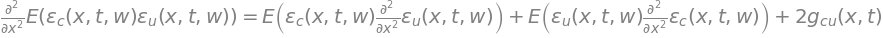

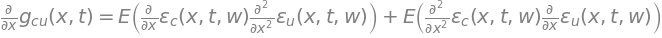

In [101]:

d = [Eq(Derivative(E(epsc*epsu), x), E(Derivative(epsu, x)*epsc) + E(Derivative(epsc, x)*epsu)), Eq(Derivative(E(epsc*epsu), x, 2), E(Derivative(epsu, x, 2)*epsc) + 2*gcu + E(Derivative(epsc, x, 2)*epsu)), Eq(Derivative(gcu, x), E(Derivative(epsu, x)*Derivative(epsc, x, 2))+E(Derivative(epsu, x, 2)*Derivative(epsc, x)))]
for i in d:
    display(i)

### Relation Dérivée temporelle

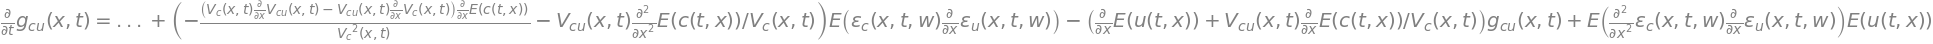

In [91]:
Add = symbols("...")
Eq(Derivative(gcu, t), -(((Derivative(Vcu, x)*Vc-Derivative(Vc, x)*Vcu)/Vc**2)*Derivative(E(c), x) + Vcu/Vc*Derivative(E(c), x, 2))*E(epsc*Derivative(epsu, x))- (Vcu/Vc*Derivative(E(c), x)+ Derivative(E(u), x))*gcu + E(u)*E(Derivative(epsu, x)*Derivative(epsc, x, 2)) + Add)

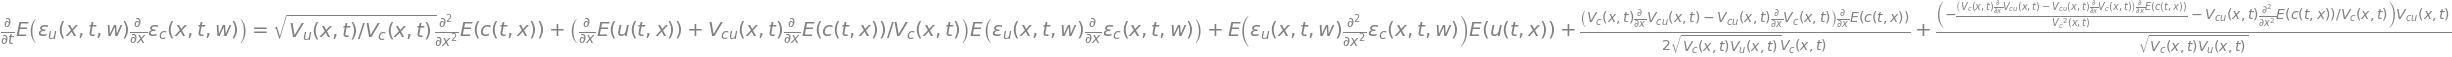

In [106]:
Eq1 = Eq(Derivative(E(epsc*Derivative(epsu, x)), t), -Vcu/Vc*Derivative(E(c), x)*E(epsc*Derivative(epsu, x)) + E(u)*gcu )
Eq2 = Eq(Derivative(E(epsu*Derivative(epsc, x)), t), -((Derivative(Vcu, x)*Vc-Derivative(Vc, x)*Vcu)/Vc**2*Derivative(E(c), x) + Vcu/Vc*Derivative(E(c), x, 2))*Vcu/sympy.sqrt(Vc*Vu) + (Vcu/Vc*Derivative(E(c), x)+Derivative(E(u), x))*E(epsu*Derivative(epsc, x)) + ((Derivative(Vcu, x)*Vc-Derivative(Vc, x)*Vcu)/(2*sympy.sqrt(Vc*Vu)*Vc)*Derivative(E(c), x)+ sympy.sqrt(Vu/Vc)*Derivative(E(c), x, 2)) + E(u)*E(epsu*Derivative(epsc, x, 2)))
Equation = [Eq1, Eq2]
for eq in Equation:
    display(eq)